In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st


In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/SepsisDataset/CombinedGEOCohorts/Cohort2_EMTAB4421_EMTAB4451.csv')
df


,database,GEO Cohort,accession,organism,Gender,Age (yr),pathogen,Sepsis Response Group,Survival Status,Tissue,Cohort Type,Remarks,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,E-MTAB,E-MTAB-4421,CAP0001,Homo sapiens,male,70,NaN,group 2,non-survivor,leukocyte,Deviation Cohort,Pathogen Type NOT specified,NaN,NaN,E-MTAB-4421
1,E-MTAB,E-MTAB-4421,CAP0002,Homo sapiens,male,64,NaN,group 2,survivor,leukocyte,Deviation Cohort,Pathogen Type NOT specified,NaN,NaN,E-MTAB-4451
2,E-MTAB,E-MTAB-4421,CAP0003,Homo sapiens,male,47,NaN,group 2,survivor,leukocyte,Deviation Cohort,Pathogen Type NOT specified,NaN,NaN,NaN
3,E-MTAB,E-MTAB-4421,CAP0004,Homo sapiens,female,71,NaN,group 2,survivor,leukocyte,Deviation Cohort,Pathogen Type NOT specified,NaN,NaN,NaN
4,E-MTAB,E-MTAB-4421,CAP0005,Homo sapiens,male,45,NaN,group 1,survivor,leukocyte,Deviation Cohort,Pathogen Type NOT specified,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,E-MTAB,E-MTAB-4451,CAP0360,Homo sapiens,male,85,NaN,2,non-survivor,leukocyte,Validation cohort,Pathogen Type NOT specified,NaN,NaN,NaN
380,E-MTAB,E-MTAB-4451,CAP0370,Homo sapiens,male,86,NaN,2,survivor,leukocyte,Validation cohort,Pathogen Type NOT specified,NaN,NaN,NaN
381,E-MTAB,E-MTAB-4451,CAP0277,Homo sapiens,male,90,NaN,2,survivor,leukocyte,Validation cohort,Pathogen Type NOT specified,NaN,NaN,NaN
382,E-MTAB,E-MTAB-4451,CAP0369,Homo sapiens,female,91,NaN,2,non-survivor,leukocyte,Validation cohort,Pathogen Type NOT specified,NaN,NaN,NaN


In [ ]:
for col in df.columns:
    print(col)

database
GEO Cohort
accession
organism
Gender
Age (yr)
pathogen
Sepsis Response Group 
Survival Status
Tissue
Cohort Type
Remarks
Unnamed: 12
Unnamed: 13
Unnamed: 14


# **Data Cleaning**

In [ ]:
df1= df.drop(columns=['pathogen', 'Remarks',	'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'])

df1=df1.dropna(how='all')
df1

,database,GEO Cohort,accession,organism,Gender,Age (yr),Sepsis Response Group,Survival Status,Tissue,Cohort Type
0,E-MTAB,E-MTAB-4421,CAP0001,Homo sapiens,male,70,group 2,non-survivor,leukocyte,Deviation Cohort
1,E-MTAB,E-MTAB-4421,CAP0002,Homo sapiens,male,64,group 2,survivor,leukocyte,Deviation Cohort
2,E-MTAB,E-MTAB-4421,CAP0003,Homo sapiens,male,47,group 2,survivor,leukocyte,Deviation Cohort
3,E-MTAB,E-MTAB-4421,CAP0004,Homo sapiens,female,71,group 2,survivor,leukocyte,Deviation Cohort
4,E-MTAB,E-MTAB-4421,CAP0005,Homo sapiens,male,45,group 1,survivor,leukocyte,Deviation Cohort
...,...,...,...,...,...,...,...,...,...,...
379,E-MTAB,E-MTAB-4451,CAP0360,Homo sapiens,male,85,2,non-survivor,leukocyte,Validation cohort
380,E-MTAB,E-MTAB-4451,CAP0370,Homo sapiens,male,86,2,survivor,leukocyte,Validation cohort
381,E-MTAB,E-MTAB-4451,CAP0277,Homo sapiens,male,90,2,survivor,leukocyte,Validation cohort
382,E-MTAB,E-MTAB-4451,CAP0369,Homo sapiens,female,91,2,non-survivor,leukocyte,Validation cohort


In [ ]:
df1.loc [(df1['Age (yr)']>= 18) & (df1['Age (yr)']<= 35) , 'Age']= 'Young'
df1.loc [(df1['Age (yr)']>= 36) & (df1['Age (yr)']<= 64) , 'Age']= 'Middle'
df1.loc [(df1['Age (yr)']>= 65) , 'Age']= 'Elderly'
df1

,database,GEO Cohort,accession,organism,Gender,Age (yr),Sepsis Response Group,Survival Status,Tissue,Cohort Type,Age
0,E-MTAB,E-MTAB-4421,CAP0001,Homo sapiens,male,70,group 2,non-survivor,leukocyte,Deviation Cohort,Elderly
1,E-MTAB,E-MTAB-4421,CAP0002,Homo sapiens,male,64,group 2,survivor,leukocyte,Deviation Cohort,Middle
2,E-MTAB,E-MTAB-4421,CAP0003,Homo sapiens,male,47,group 2,survivor,leukocyte,Deviation Cohort,Middle
3,E-MTAB,E-MTAB-4421,CAP0004,Homo sapiens,female,71,group 2,survivor,leukocyte,Deviation Cohort,Elderly
4,E-MTAB,E-MTAB-4421,CAP0005,Homo sapiens,male,45,group 1,survivor,leukocyte,Deviation Cohort,Middle
...,...,...,...,...,...,...,...,...,...,...,...
379,E-MTAB,E-MTAB-4451,CAP0360,Homo sapiens,male,85,2,non-survivor,leukocyte,Validation cohort,Elderly
380,E-MTAB,E-MTAB-4451,CAP0370,Homo sapiens,male,86,2,survivor,leukocyte,Validation cohort,Elderly
381,E-MTAB,E-MTAB-4451,CAP0277,Homo sapiens,male,90,2,survivor,leukocyte,Validation cohort,Elderly
382,E-MTAB,E-MTAB-4451,CAP0369,Homo sapiens,female,91,2,non-survivor,leukocyte,Validation cohort,Elderly


# **Data Visualization**




In [ ]:
df2 = df1.groupby(['Gender', 'Survival Status']).size().reset_index()
df2= df2.rename(columns={0:'Survival status Count'})
df2

,Gender,Survival Status,Survival status Count
0,female,non-survivor,43
1,female,survivor,110
2,male,non-survivor,72
3,male,survivor,159


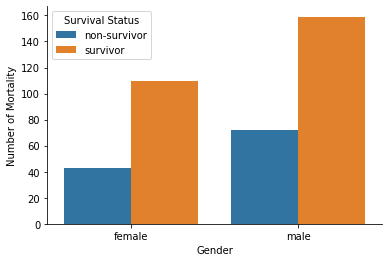

In [ ]:
axes1=sns.barplot(data=df2,x='Gender',y='Survival status Count', hue='Survival Status')
axes1.set(xlabel='Gender', ylabel='Number of Mortality')
sns.despine()

In [ ]:
df3 = df1.groupby(['Survival Status', 'Gender']).size().reset_index()
df3= df3.rename(columns={0:'Gender Count'})
df3

,Survival Status,Gender,Gender Count
0,non-survivor,female,43
1,non-survivor,male,72
2,survivor,female,110
3,survivor,male,159


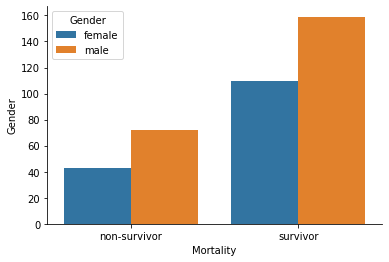

In [ ]:
axes2=sns.barplot(data=df3,x='Survival Status',y='Gender Count', hue='Gender')
axes2.set(xlabel='Mortality', ylabel='Gender')
sns.despine()

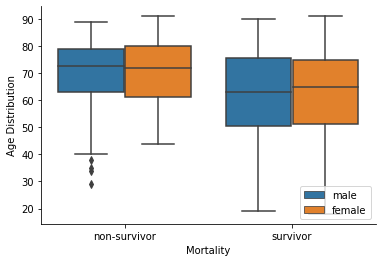

In [ ]:
axes3=sns.boxplot(data=df1,x='Survival Status',y='Age (yr)', hue='Gender')
axes3.set(xlabel='Mortality', ylabel='Age Distribution')
plt.legend(loc='lower right')
sns.despine()

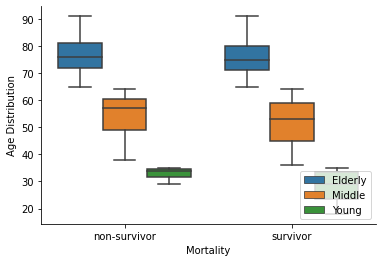

In [ ]:
axes3=sns.boxplot(data=df1,x='Survival Status',y='Age (yr)', hue='Age')
axes3.set(xlabel='Mortality', ylabel='Age Distribution')
plt.legend(loc='lower right')
sns.despine()

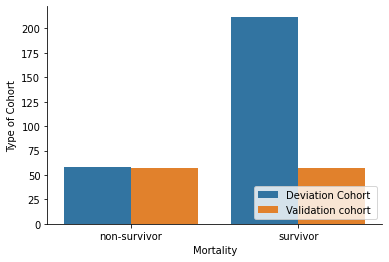

In [ ]:
df4 = df1.groupby(['Survival Status', 'Cohort Type']).size().reset_index()
df4= df4.rename(columns={0:'Cohort Type Count'})
df4

axes3=sns.barplot(data=df4,x='Survival Status',y='Cohort Type Count', hue='Cohort Type')
axes3.set(xlabel='Mortality', ylabel='Type of Cohort')
plt.legend(loc='lower right')
sns.despine()